In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.decomposition import PCA
from scipy.stats import shapiro, probplot
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', None)

## Read Dataset

In [3]:
data = pd.read_csv('Wine.csv', sep=',')
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.040,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.050,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.030,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.860,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.040,2.93,735,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.050,2.85,1450,1
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.020,3.58,1290,1
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.060,3.58,1295,1
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.080,2.85,1045,1
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.010,3.55,1045,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [6]:
duplicates = data[data.duplicated()]

if not duplicates.empty:
    print("Data duplikat ditemukan:")
    print(duplicates)
else:
    print("Tidak ada data duplikat")

Tidak ada data duplikat


In [7]:
data['Customer_Segment'].value_counts()

Customer_Segment
2    71
1    59
3    48
Name: count, dtype: int64

In [8]:
X = data.drop(columns = 'Customer_Segment')
y = data['Customer_Segment']

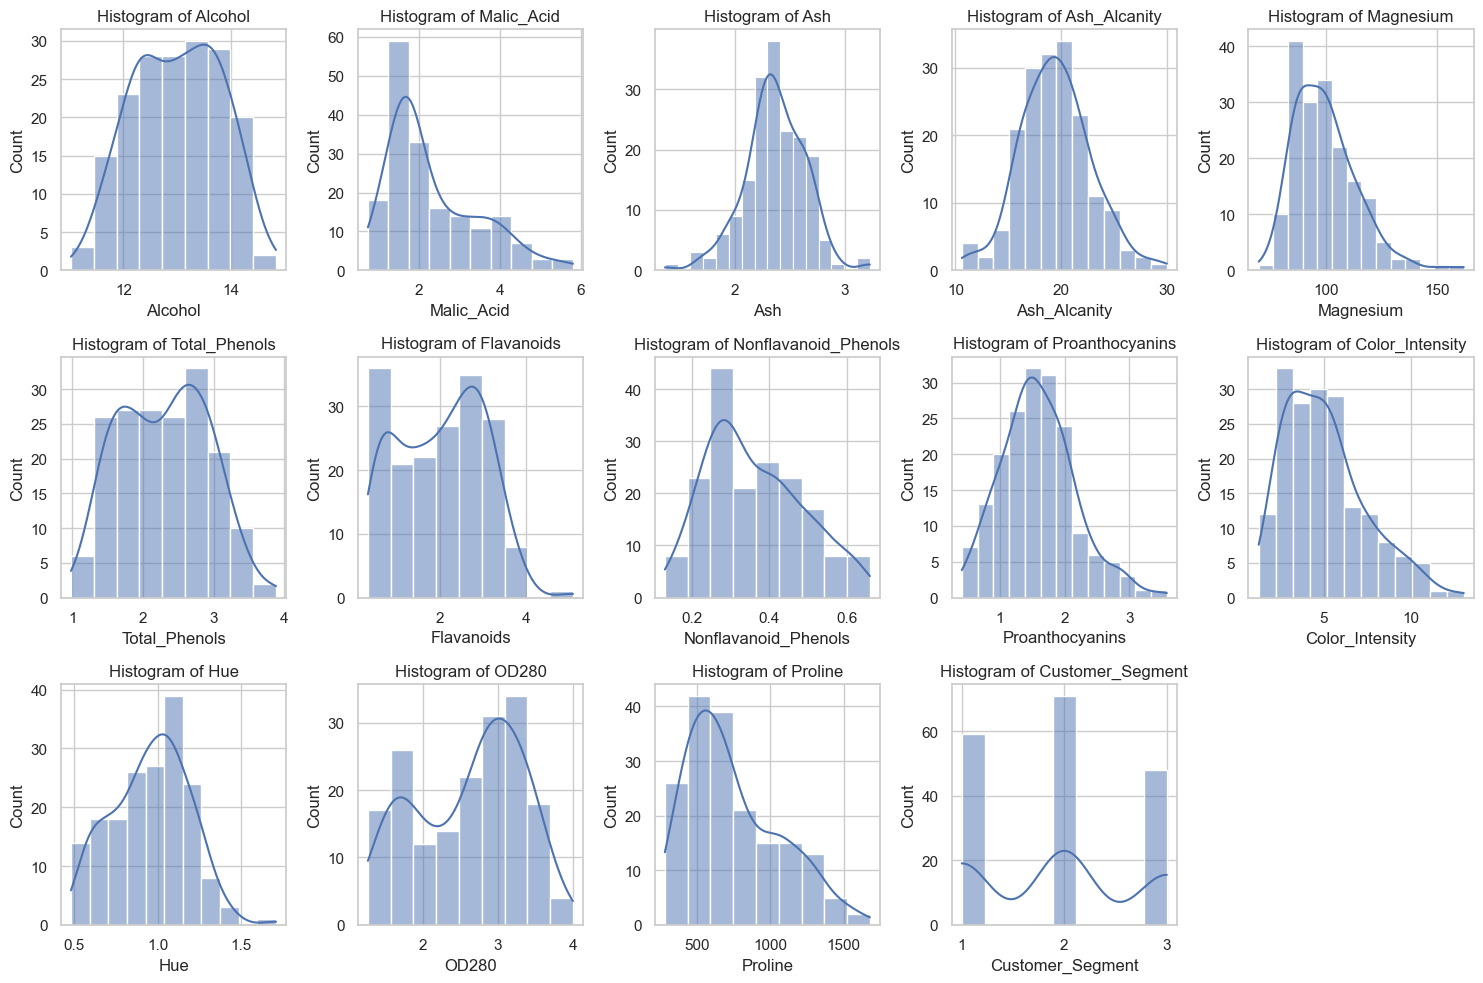

Shapiro-Wilk test for Alcohol: Statistic=0.981804609298706, p-value=0.020050711929798126
Shapiro-Wilk test for Malic_Acid: Statistic=0.8887840509414673, p-value=2.94582247484243e-10
Shapiro-Wilk test for Ash: Statistic=0.9839476346969604, p-value=0.038691021502017975
Shapiro-Wilk test for Ash_Alcanity: Statistic=0.9902263879776001, p-value=0.26394858956336975
Shapiro-Wilk test for Magnesium: Statistic=0.9383310079574585, p-value=6.345416068143095e-07
Shapiro-Wilk test for Total_Phenols: Statistic=0.9766812920570374, p-value=0.0043947165831923485
Shapiro-Wilk test for Flavanoids: Statistic=0.9545267224311829, p-value=1.6790636436780915e-05
Shapiro-Wilk test for Nonflavanoid_Phenols: Statistic=0.9625223875045776, p-value=0.00010552681487752125
Shapiro-Wilk test for Proanthocyanins: Statistic=0.980722963809967, p-value=0.01445252075791359
Shapiro-Wilk test for Color_Intensity: Statistic=0.9403189420700073, p-value=9.230111004399078e-07
Shapiro-Wilk test for Hue: Statistic=0.98134237527847

In [9]:
# Memeriksa distribusi menggunakan histogram
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
for column in data.columns:
    plt.subplot(3, 5, list(data.columns).index(column) + 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

# Menguji normalitas menggunakan uji Shapiro-Wilk
p_values = []  # Collect p-values in a list
for column in data.columns:
    stat, p_value = shapiro(data[column])
    p_values.append(p_value)
    print(f"Shapiro-Wilk test for {column}: Statistic={stat}, p-value={p_value}")

# Menggunakan alpha = 0.05 sebagai tingkat signifikansi
alpha = 0.05
if all(p_value > alpha for p_value in p_values):
    print("Semua fitur terdistribusi normal.")
else:
    print("Tidak semua fitur terdistribusi normal.")


### Penyeragaman Skala Data dengan StandardScaller

In [10]:
cols = X.columns

In [11]:
std = StandardScaler()
x_std = std.fit_transform(X)
x_std

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [12]:
x_std = pd.DataFrame(x_std, columns=[cols])
x_std

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
5,1.481555,-0.517367,0.305159,-1.289707,0.860705,1.562093,1.366128,-0.176095,0.664217,0.731870,0.406051,0.336606,2.239039
6,1.716255,-0.418624,0.305159,-1.469878,-0.262708,0.328298,0.492677,-0.498407,0.681738,0.083015,0.274431,1.367689,1.729520
7,1.308617,-0.167278,0.890014,-0.569023,1.492625,0.488531,0.482637,-0.417829,-0.597284,-0.003499,0.449924,1.367689,1.745442
8,2.259772,-0.625086,-0.718336,-1.650049,-0.192495,0.808997,0.954502,-0.578985,0.681738,0.061386,0.537671,0.336606,0.949319
9,1.061565,-0.885409,-0.352802,-1.049479,-0.122282,1.097417,1.125176,-1.143031,0.453967,0.935177,0.230557,1.325316,0.949319


### Kmeans

In [13]:
kmeans = KMeans(n_clusters = 2,
               init = 'k-means++',
               n_init = 'warn',
                max_iter = 500,
                tol = 0.0001
               )

In [16]:
std_kmeans = kmeans.fit(x_std)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [27]:
labels = kmeans.labels_

# Mendapatkan pusat cluster (centroid)
centroids = std_kmeans.cluster_centers_

# Menambahkan label cluster ke DataFrame
X['Cluster'] = labels
X

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.040,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.050,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.030,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.860,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.040,2.93,735,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.050,2.85,1450,1
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.020,3.58,1290,1
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.060,3.58,1295,1
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.080,2.85,1045,1
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.010,3.55,1045,1


In [28]:
centroids

array([[-0.07297886,  0.66451047,  0.18987553,  0.51662255, -0.15468782,
        -0.94370681, -1.04663574,  0.83794915, -0.71615568,  0.54346866,
        -0.88207198, -1.06931809, -0.45318098],
       [ 0.04197899, -0.38224053, -0.10922044, -0.29717226,  0.08897972,
         0.5428402 ,  0.60204711, -0.48200615,  0.41194796, -0.31261472,
         0.50738654,  0.61509448,  0.26067933]])

In [29]:
X.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Cluster'],
      dtype='object')

In [30]:
for i in range (4):
    print(f'Iterasi ke-{i+1} dengan centroid {kmeans.cluster_centers_[:, i]}')

Iterasi ke-1 dengan centroid [-0.07297886  0.04197899]
Iterasi ke-2 dengan centroid [ 0.66451047 -0.38224053]
Iterasi ke-3 dengan centroid [ 0.18987553 -0.10922044]
Iterasi ke-4 dengan centroid [ 0.51662255 -0.29717226]


In [32]:
std_kmeans.inertia_

1659.0079672511501

### Predict Data

In [34]:
le = LabelEncoder()
y_en = le.fit_transform(y)

In [38]:
hasil_std_kmeans = std_kmeans.predict(x_std)
hasil_std_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [41]:
acc_std_kmeans = metrics.accuracy_score(y_en,hasil_std_kmeans)
acc_std_kmeans

0.30337078651685395

In [42]:
kmeans.cluster_centers_[:, 1]

array([ 0.66451047, -0.38224053])

In [43]:
kmeans.cluster_centers_[:, 0]

array([-0.07297886,  0.04197899])

In [66]:
n_clusters = 2

### Inersia Tiap Model

In [45]:
cs_std = []
for i in range(1, 16):
    kmeans_std = KMeans(n_clusters = i, init = 'k-means++', n_init = 'warn', max_iter = 500, tol = 0.0001)
    kmeans_std.fit(x_std)
    cs_std.append(kmeans_std.inertia_)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

In [46]:
cs_std

[2314.0000000000005,
 1658.7588524290952,
 1277.928488844642,
 1175.7051928197118,
 1110.7294443144474,
 1042.0618169145223,
 993.5166943906825,
 933.7112916022104,
 898.350492713547,
 869.112772084135,
 821.5048151199813,
 789.8693694388026,
 767.9127860783303,
 749.0324240636323,
 731.9581975238626]

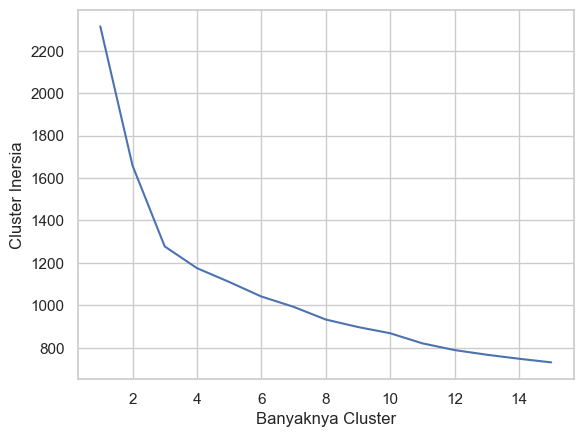

In [47]:
plt.plot(range(1,16),cs_std)
plt.xlabel('Banyaknya Cluster')
plt.ylabel('Cluster Inersia')
plt.show()

In [48]:
result_std = []
for i in range(1, len(cs_std)):
    diff = cs_std[i] - cs_std[i - 1]
    result_std.append(abs(diff))

In [49]:
result_std

[655.2411475709052,
 380.83036358445315,
 102.22329602493028,
 64.97574850526439,
 68.6676273999251,
 48.54512252383984,
 59.805402788472065,
 35.36079888866334,
 29.237720629412024,
 47.607956964153686,
 31.635445681178794,
 21.956583360472223,
 18.880362014697994,
 17.07422653976971]

In [51]:
homogenitas_std = metrics.homogeneity_score(y_en, hasil_std_kmeans)
homogenitas_std

0.4021779641650507

In [54]:
# Initialize the PCA model with the desired number of components
pca = PCA(n_components=2)
# Fit and transform the data
data_pca = pca.fit_transform(x_std)
data_pca

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082],
       [ 3.05025392, -2.12240111],
       [ 2.44908967, -1.17485013],
       [ 2.05943687, -1.60896307],
       [ 2.5108743 , -0.91807096],
       [ 2.75362819, -0.78943767],
       [ 3.47973668, -1.30233324],
       [ 1.7547529 , -0.61197723],
       [ 2.11346234, -0.67570634],
       [ 3.45815682, -1.13062988],
       [ 4.31278391, -2.09597558],
       [ 2.3051882 , -1.66255173],
       [ 2.17195527, -2.32730534],
       [ 1.89897118, -1.63136888],
       [ 3.54198508, -2.51834367],
       [ 2.0845222 , -1.06113799],
       [ 3.12440254, -0.78689711],
       [ 1.08657007, -0.24174355],
       [ 2.53522408,  0.09184062],
       [ 1.64498834,  0.51627893],
       [ 1.76157587,  0.31714893],
       [ 0.9900791 , -0.94066734],
       [ 1.77527763, -0.68617513],
       [ 1.23542396,  0.08980704],
       [ 2.18840633,

In [55]:
# Anda dapat mengakses komponen utama dan eksplained variance ratio (rasio varians terjelaskan) jika perlu
components = pca.components_
explained_variance_ratio = pca.explained_variance_ratio_
components

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283]])

In [56]:
explained_variance_ratio

array([0.36198848, 0.1920749 ])

In [57]:
# Membuat DataFrame dari data PCA
df_pca = pd.DataFrame(data_pca, columns=['Principal Component 1', 'Principal Component 2'])

# Menampilkan DataFrame hasil PCA
df_pca

,Principal Component 1,Principal Component 2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831
5,3.050254,-2.122401
6,2.449090,-1.174850
7,2.059437,-1.608963
8,2.510874,-0.918071
9,2.753628,-0.789438


In [58]:
kmeans.fit(df_pca)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=500, n_clusters=2)

In [59]:
kmeans.inertia_

628.788350755477

In [60]:
hasil = kmeans.predict(df_pca)
hasil

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [61]:
hasil_df = df_pca.copy()
hasil_df['predict'] = hasil

In [62]:
hasil_df.columns

Index(['Principal Component 1', 'Principal Component 2', 'predict'], dtype='object')

In [63]:
hasil_df

,Principal Component 1,Principal Component 2,predict
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,0
4,1.008908,-0.869831,0
5,3.050254,-2.122401,0
6,2.449090,-1.174850,0
7,2.059437,-1.608963,0
8,2.510874,-0.918071,0
9,2.753628,-0.789438,0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_44072\3415061515.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(hasil_df['Principal Component 1'], hasil_df['Principal Component 2'], c=colors[labels], s=50, cmap='viridis')


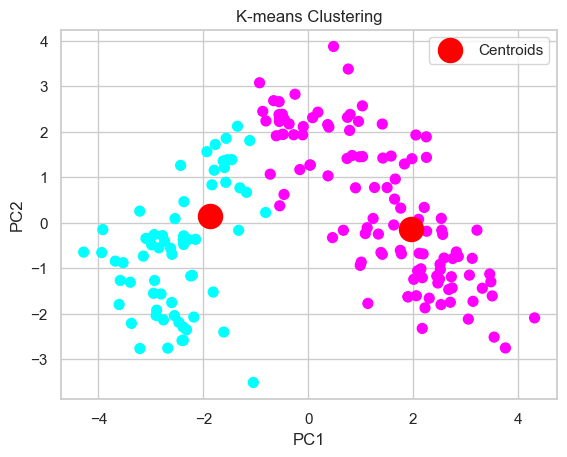

In [67]:
import matplotlib.pyplot as plt

# Warna klaster menggunakan palet warna "cool"
colors = plt.cm.cool(np.linspace(0, 1, n_clusters))  # ganti "cool" sesuai dengan palet yang diinginkan

# Visualisasi data hasil klaster
plt.scatter(hasil_df['Principal Component 1'], hasil_df['Principal Component 2'], c=colors[labels], s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering')
plt.legend()
plt.show()

In [69]:
acc = metrics.accuracy_score(y_en,hasil)
acc

0.5730337078651685